In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
crypto_df = pd.read_csv('Resources/crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.shape

(1252, 7)

In [4]:
crypto_df.value_counts()

Unnamed: 0  CoinName     Algorithm    IsTrading  ProofType  TotalCoinsMined  TotalCoinSupply
1337        EliteCoin    X13          True       PoW/PoS    2.927942e+10     314159265359       1
POKER       PokerCoin    Scrypt       False      PoS/PoW    0.000000e+00     466666667          1
PKB         ParkByte     SHA-256      True       PoW/PoS    0.000000e+00     25000000           1
PLNC        PLNCoin      Scrypt       True       PoW/PoS    1.708960e+07     38540000           1
PLTC        PlatinCoin   CryptoNight  True       PoW        8.430000e+04     600000518          1
                                                                                               ..
FAIR        FairCoin     Groestl      True       PoW/PoS    5.319383e+07     0                  1
FC2         Fuel2Coin    X11          True       PoS        0.000000e+00     100000000          1
FCN         FantomCoin   CryptoNight  True       PoW        0.000000e+00     18400000           1
FIBRE       FIBRE        

In [5]:
crypto_df = crypto_df[crypto_df['IsTrading']== True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [6]:
crypto_df = crypto_df.drop(columns = 'IsTrading')

In [7]:
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [8]:
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]>0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
CoinName = pd.DataFrame(crypto_df['CoinName']).reset_index(drop=True)
CoinName

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [10]:
crypto_df.drop(columns='CoinName', axis=1, inplace=True)
crypto_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [11]:
crypto_df = crypto_df.drop(columns=['Unnamed: 0'])
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [12]:
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [14]:
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)

In [15]:
len(X.columns)

98

In [16]:
pca = PCA(n_components=4)

crypto_pcal = pca.fit_transform(crypto_scaled)

In [17]:
df_crypto_pcal = pd.DataFrame(data=crypto_pcal,
                             columns=["PC 1", "PC 2", "PC 3", "PC 4"])
df_crypto_pcal.head()

,PC 1,PC 2,PC 3,PC 4
0,-0.329974,1.007617,-0.606405,0.018546
1,-0.313311,1.007759,-0.606883,0.018521
2,2.299156,1.670170,-0.718034,0.050432
3,-0.150476,-1.351712,0.241776,0.007292
4,-0.157008,-2.022227,0.435436,-0.026193


In [18]:
pca.explained_variance_ratio_

array([0.02792993, 0.02135497, 0.02049571, 0.02044378])

In [19]:
pca2 = PCA(n_components=0.90)

crypto_pca = pca2.fit_transform(crypto_scaled)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -3.40977830e-15,  2.22076552e-15,  6.42659297e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -3.01106011e-15,  2.43127173e-15,  6.42924863e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         1.32193780e-14,  2.20748312e-14, -1.21293344e-13],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -5.15492913e-14,  6.20521983e-14,  1.25480164e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         5.88359510e-16, -3.81930275e-15, -5.32858256e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         3.47280771e-15, -7.04509709e-16, -2.04859514e-15]])

In [20]:
transformed_crypto_pca = pd.DataFrame(data=crypto_pca)
transformed_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-3.136999e-14,-4.821010e-16,9.603886e-12,-0.007129,-1.319756,-0.051813,...,-6.771792e-15,-3.052752e-15,-8.627925e-15,-3.568670e-15,5.645601e-15,-5.160671e-15,3.358784e-15,-3.409778e-15,2.220766e-15,6.426593e-15
1,-0.318434,1.032331,-0.591126,0.001386,-3.141457e-14,-5.834615e-16,9.525211e-12,-0.007739,-1.322514,-0.056674,...,-6.419722e-15,-3.302109e-15,-9.051238e-15,-2.644646e-15,6.804945e-15,-4.931547e-15,2.759349e-15,-3.011060e-15,2.431272e-15,6.429249e-15
2,2.305468,1.656383,-0.683617,0.004731,-4.740693e-14,-1.451575e-15,3.257690e-11,-0.054781,-1.542879,-0.943951,...,1.072641e-13,9.618733e-14,1.031146e-13,-2.318254e-14,-9.054807e-15,1.592732e-14,-1.353834e-13,1.321938e-14,2.207483e-14,-1.212933e-13
3,-0.145184,-1.320593,0.192813,-0.001229,9.741834e-15,1.131182e-16,-8.456718e-12,-0.002071,0.281463,0.251862,...,5.279810e-15,1.011600e-14,6.069518e-15,-4.760577e-15,-4.234022e-15,1.326413e-14,-1.317260e-14,-9.030146e-15,3.265534e-15,-9.516191e-15
4,-0.151768,-2.036192,0.396182,-0.001705,2.314928e-14,3.024917e-16,-1.173221e-11,0.027735,0.519099,0.188820,...,-1.552802e-13,-1.028183e-13,-1.339452e-13,1.342958e-14,3.693619e-14,7.047069e-14,-1.238247e-14,-1.875127e-13,9.645716e-14,7.147512e-14


In [21]:
pca.explained_variance_ratio_

array([0.02792993, 0.02135497, 0.02049571, 0.02044378])

([<matplotlib.axis.XTick at 0x7fb1f0716340>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

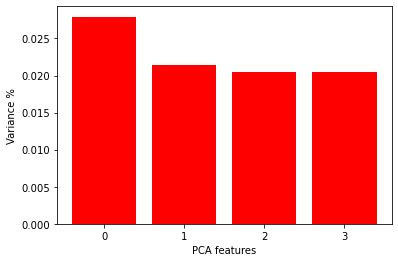

In [22]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='red')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)

In [23]:
len(transformed_crypto_pca.columns)

74

In [24]:
tsne = TSNE(learning_rate=35)

In [25]:
tsne_features = tsne.fit_transform(transformed_crypto_pca)
tsne_features.shape

(532, 2)

In [30]:
x = tsne_features[:,0]

y = tsne_features[:,1]

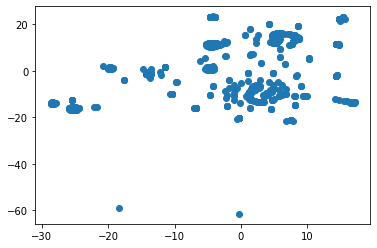

In [32]:
plt.scatter(x, y)
plt.show()

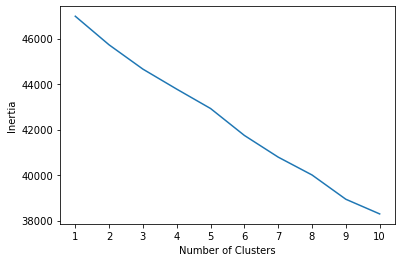

In [33]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(transformed_crypto_pca)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
df_elbow.head(10)

,k,inertia
0,1,46979.075160
1,2,45721.644472
2,3,44654.871050
3,4,43776.296588
4,5,42924.843875
5,6,41741.781630
6,7,40788.698794
7,8,40004.770494
8,9,38937.985151
9,10,38293.481097


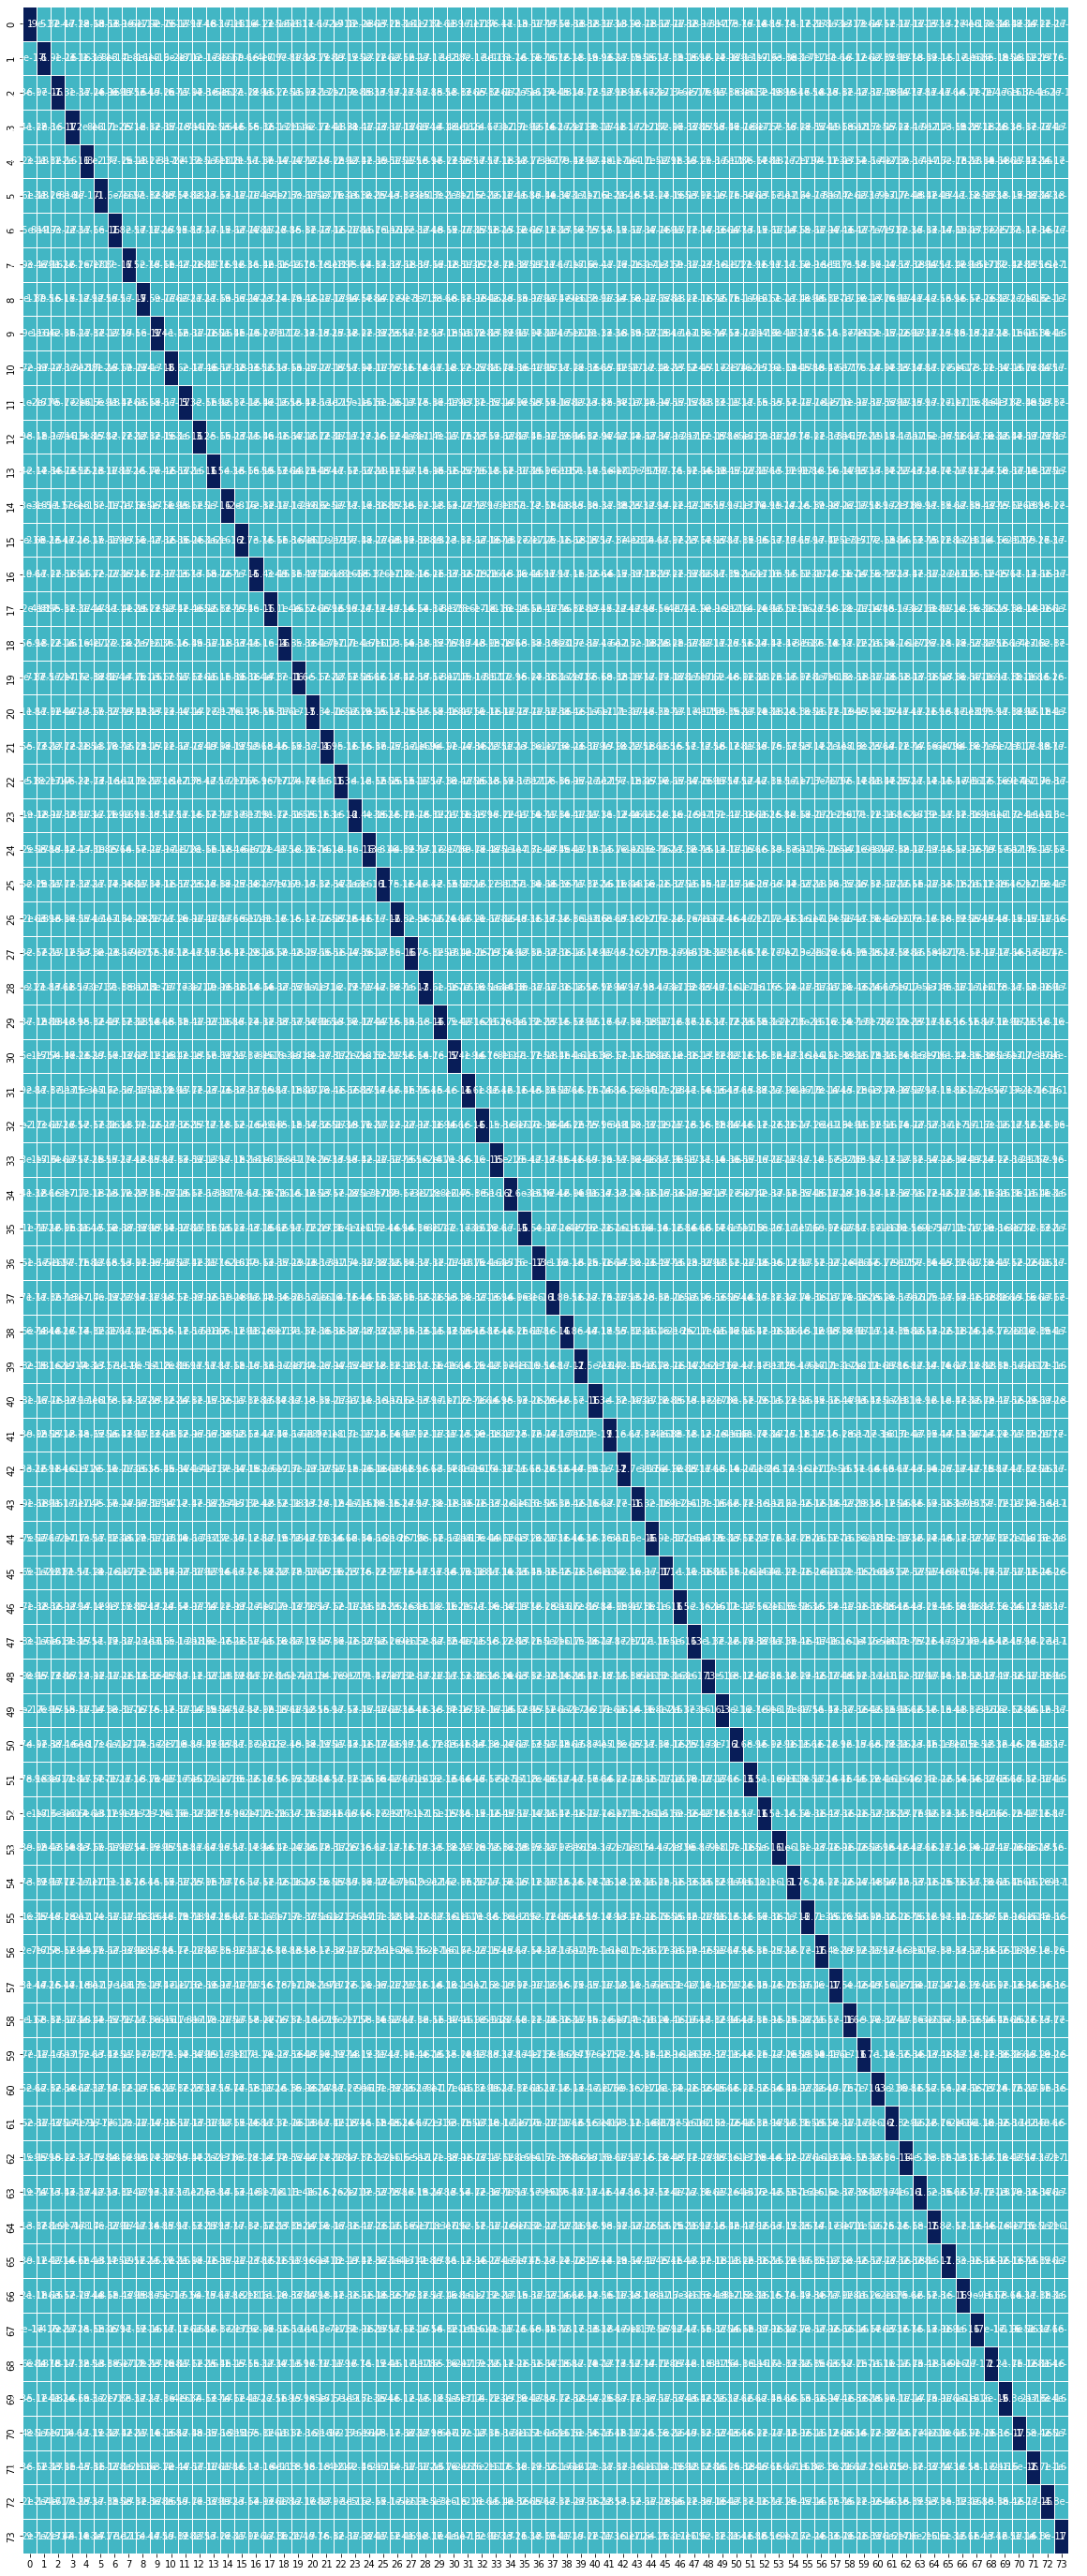

In [36]:
import seaborn as sns

plt.figure(figsize=(20,50))
sns.heatmap(transformed_crypto_pca.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    
    ax1.set_xlim([-.01, 1])
    
    ax1.set_ylim([0, len(crypto_scaled) + (n_clusters + 1) * 10])
    
    